In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_lfw_people, load_breast_cancer, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

sns.set_theme()

### Visualize faces before PCA

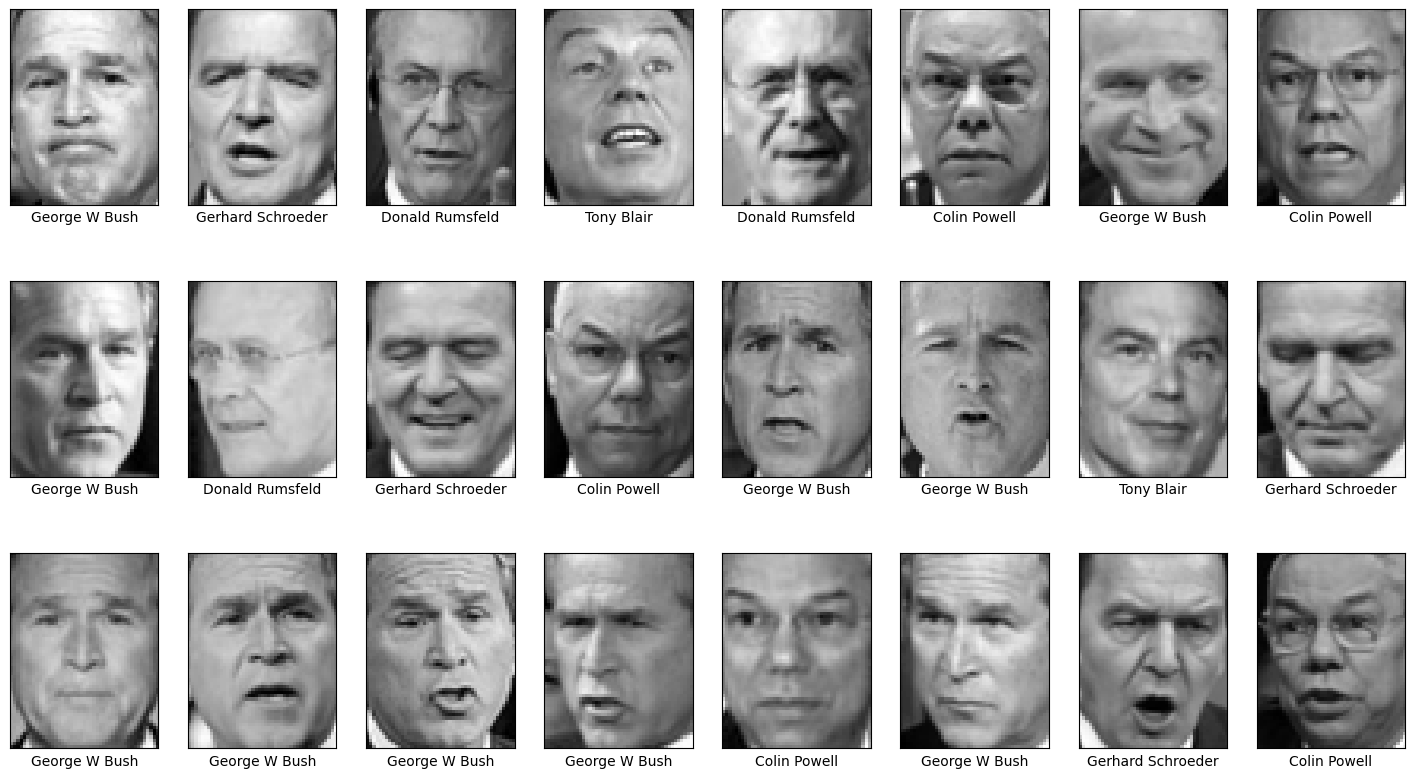

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [6]:
pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

### Visualize inverse PCA faces

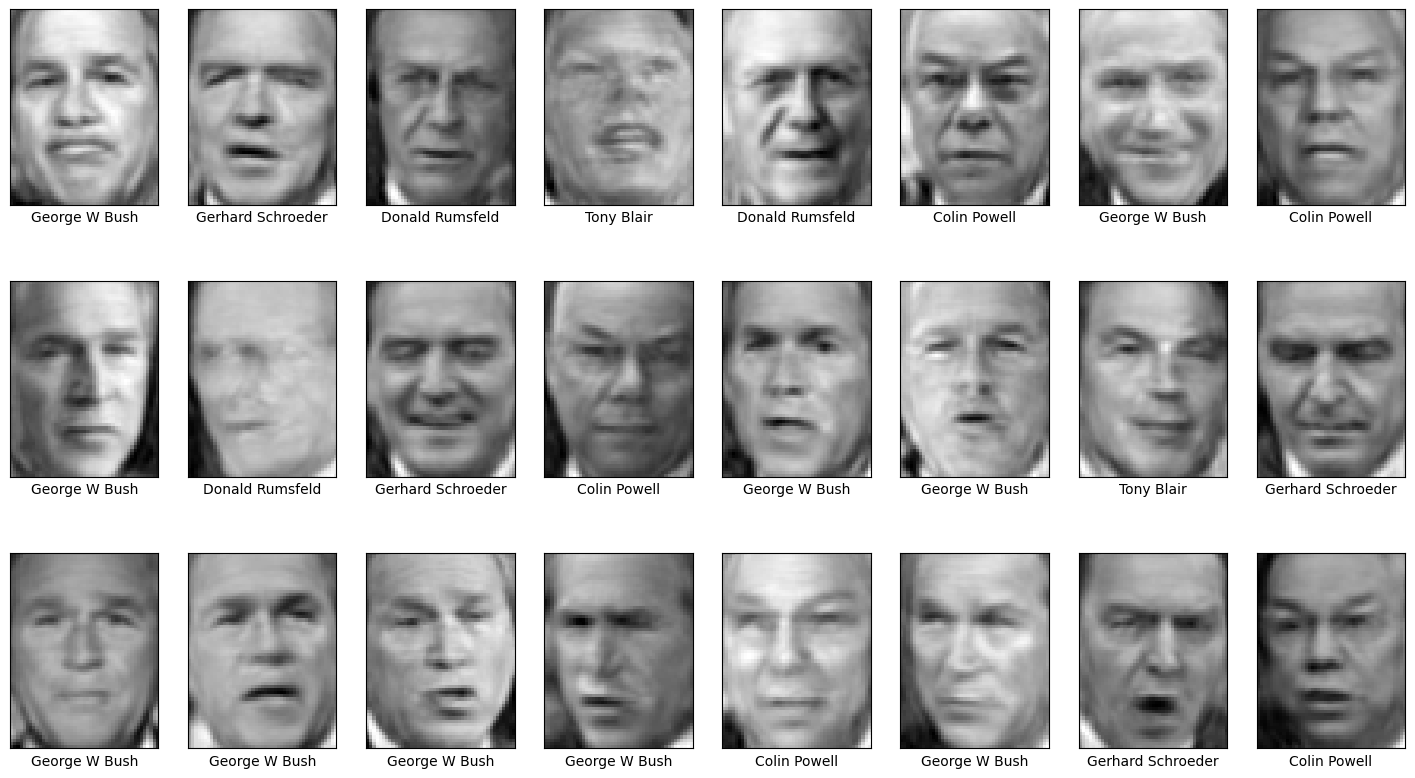

In [8]:
fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Scree plot

Text(0, 0.5, 'Expalained Variance')

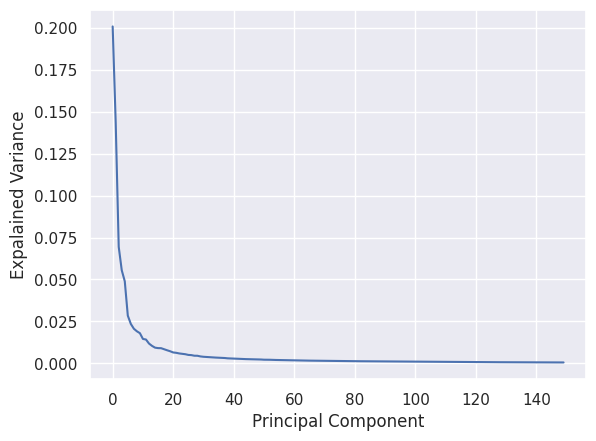

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Expalained Variance")

### Cumulative sum of Explained Variance

Text(0, 0.5, 'Cummulative Explained Variance')

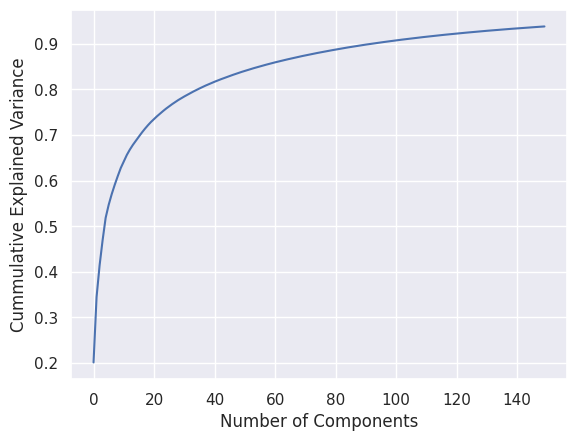

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Explained Variance")

### Filtering noise

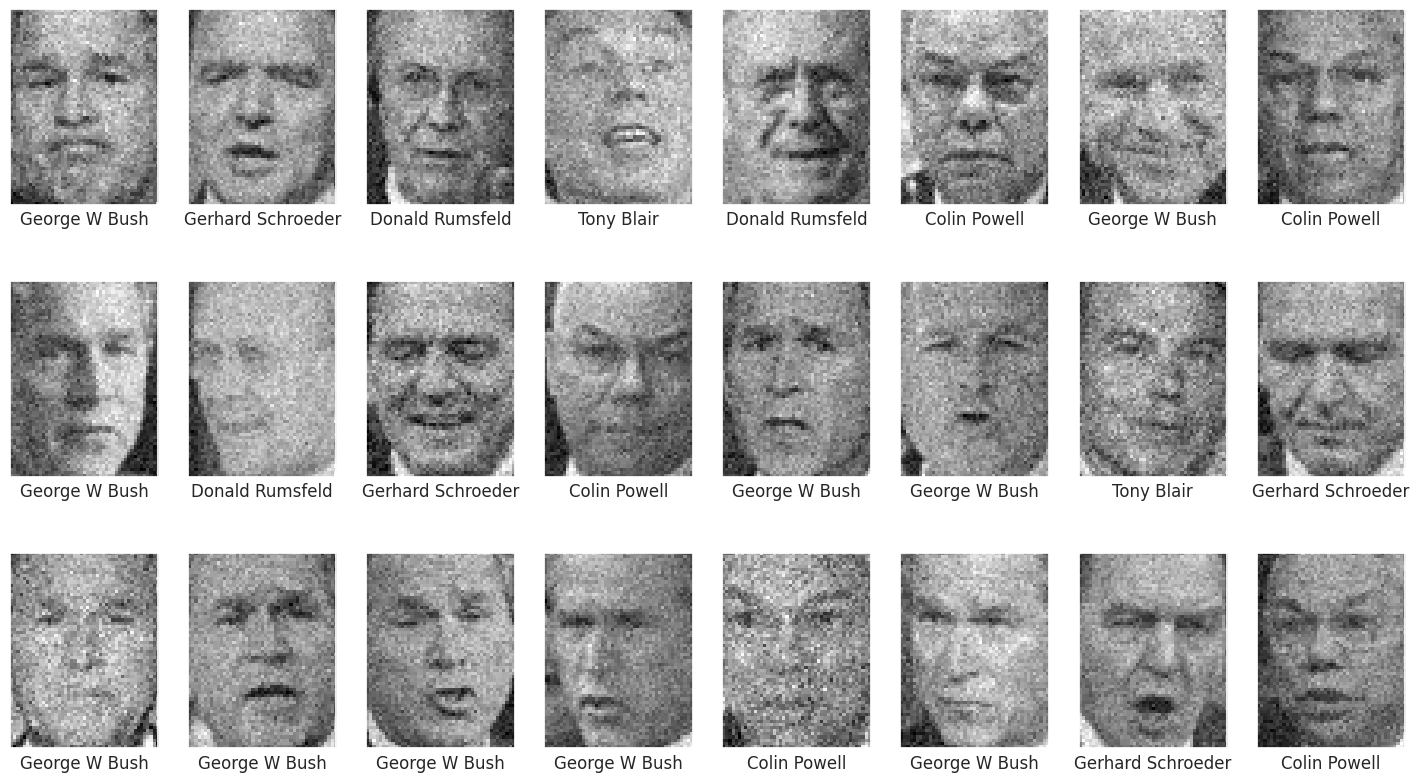

In [14]:
# adding noise to faces
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62, 47), cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [15]:
pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

179

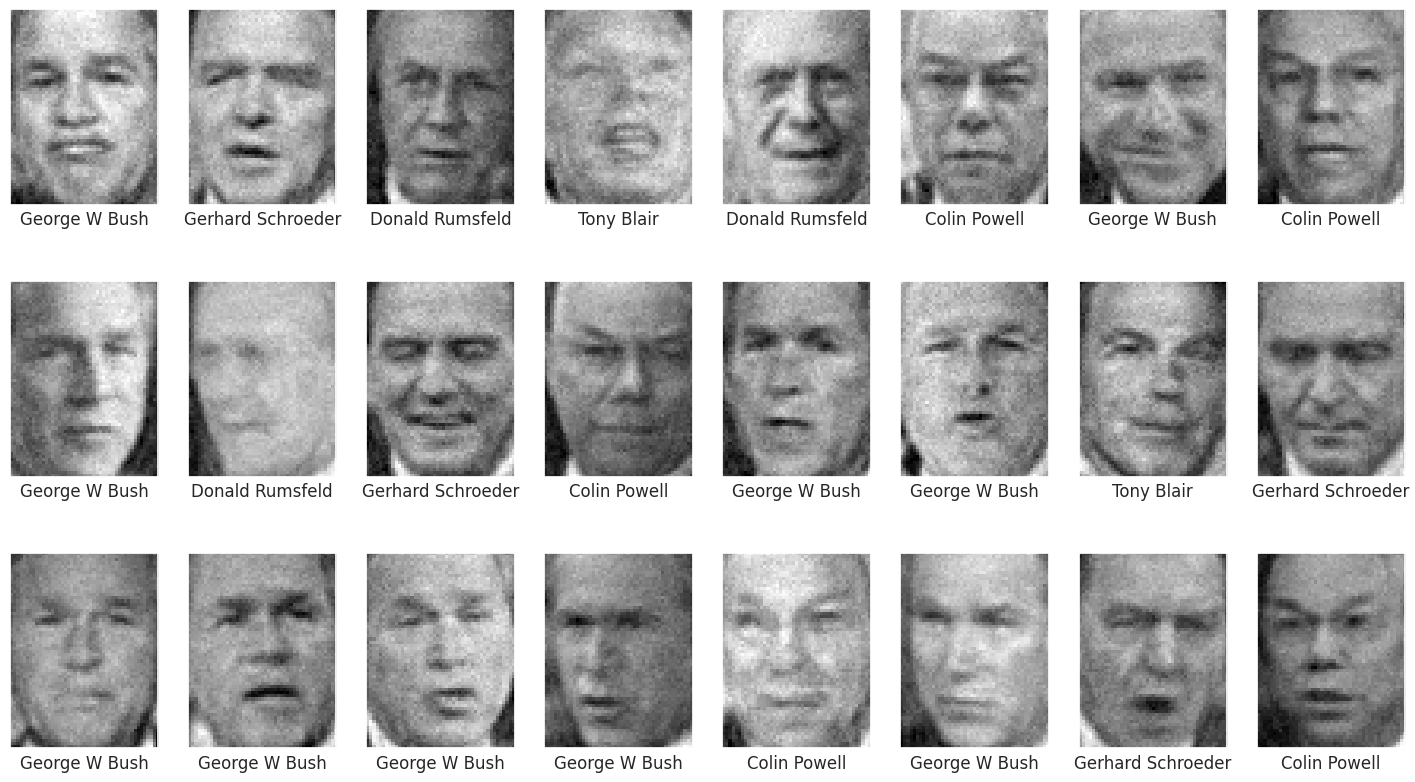

In [16]:
# reconstruct face images
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62, 47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Anonymizing Data

In [19]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
pd.set_option("display.max_columns", 6)
df.head()

,mean radius,mean texture,mean perimeter,...,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,...,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,...,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,...,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,...,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,...,0.1625,0.2364,0.07678


In [22]:
pca = PCA(n_components=30, random_state=0)
pca_data = pca.fit_transform(df)

scaler = StandardScaler()
anon_df = pd.DataFrame(scaler.fit_transform(pca_data))

pd.set_option('display.max_columns', 8)
anon_df.head()

,0,1,2,3,...,26,27,28,29
0,1.743043,-3.440692,1.832695,-1.179529,...,-1.033900,0.767070,1.406020,0.841434
1,1.906779,0.182972,-1.335313,2.418269,...,-0.043492,-0.798802,0.484854,-1.267746
2,1.496120,0.458381,-0.064503,0.568556,...,0.092680,0.010964,-0.547972,0.484234
3,-0.611764,-0.788775,0.327197,-1.592188,...,0.008095,0.811865,-1.511794,-1.978890
4,1.397781,2.216483,0.051866,1.150718,...,1.716566,0.161769,1.260500,0.390467


In [23]:
np.sum(pca.explained_variance_ratio_)

1.0

### Visualizing High-Dimensional Data

/tmp/ipykernel_225765/1611256271.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))


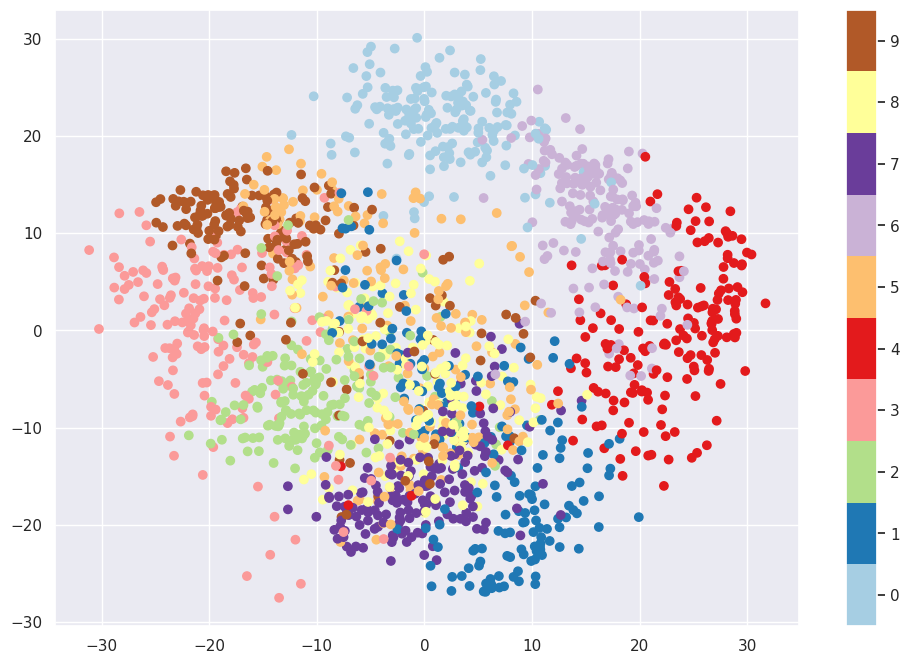

In [28]:
digits = load_digits()
pca = PCA(n_components=2, random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

### Visualizing 3D plots

In [34]:
# %matplotlib widget

digits = load_digits()
pca = PCA(n_components=3, random_state=0)
pca_digits = pca.fit_transform(digits.data)

/tmp/ipykernel_225765/476291676.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(xs = pca_digits[:, 0], ys = pca_digits[:, 1], zs = pca_digits[:, 2], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))


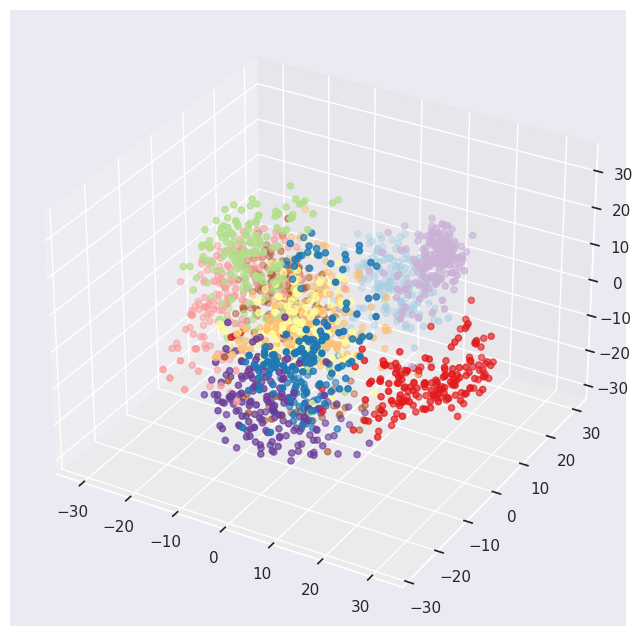

In [35]:
ax = plt.figure(figsize=(12,8)).add_subplot(111, projection="3d")
ax.scatter(xs = pca_digits[:, 0], ys = pca_digits[:, 1], zs = pca_digits[:, 2], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))

### Visualizing with t-SNE

/tmp/ipykernel_225765/2740423082.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap("Paired", 10))


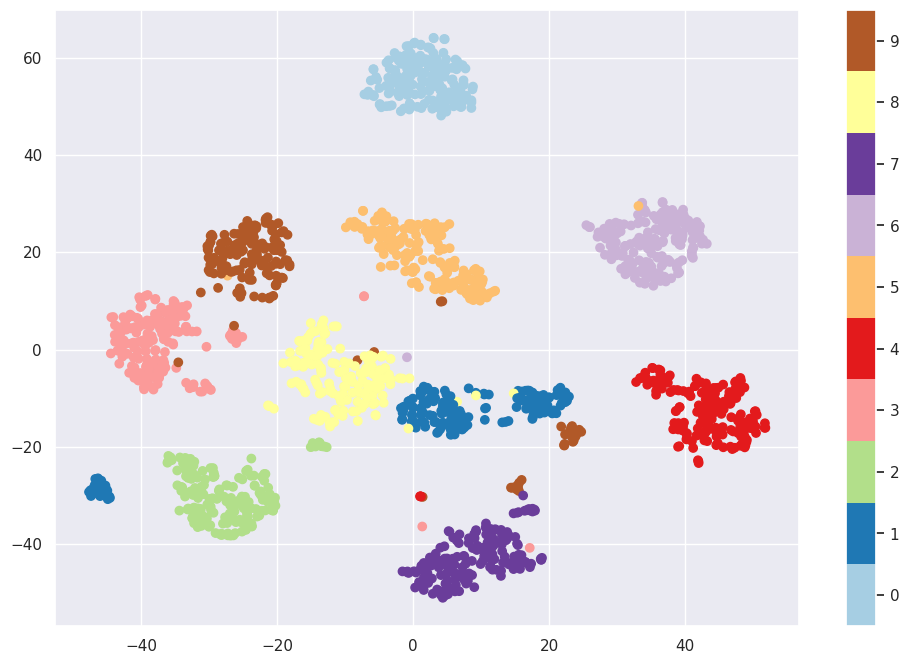

In [36]:
digits = load_digits()
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=0)
tsne_digits = tsne.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap("Paired", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

### Anomaly Detection

#### Using PCA to Detect Credit Card Fraud

In [40]:
df = pd.read_csv("sample_data/creditcard.csv")
df.head()

,Time,V1,V2,V3,...,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,...,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,...,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,...,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,...,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,...,0.219422,0.215153,69.99,0


In [41]:
# seperate samples by class
legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

In [59]:
pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored))**2, axis=1)
    loss = pd.Series(loss, index=df_original.index)
    return loss

legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

<Axes: >

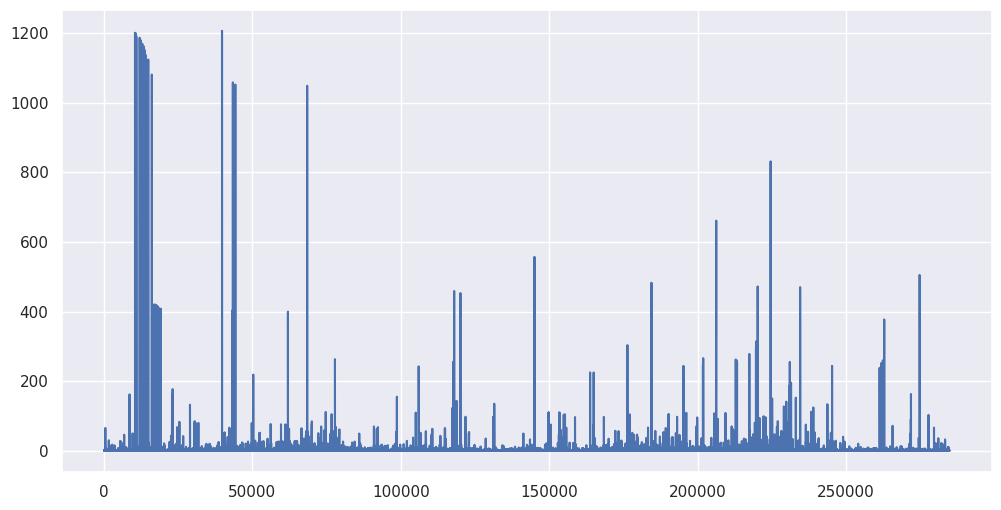

In [60]:
legit_scores.plot(figsize=(12,6))

<Axes: >

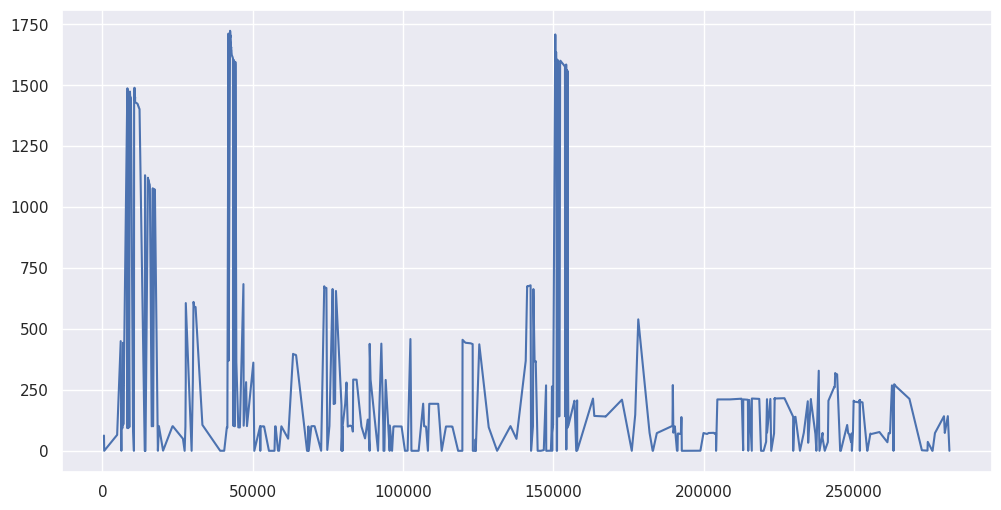

In [61]:
fraud_scores.plot(figsize=(12,6))

Text(109.44999999999997, 0.5, 'True Label')

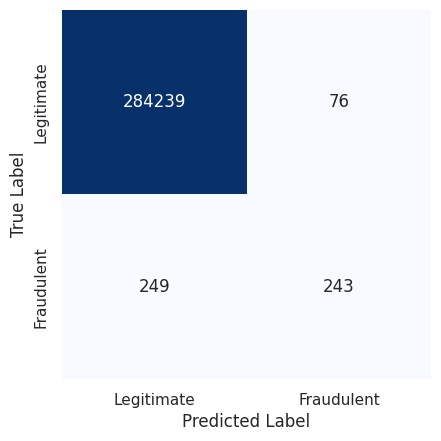

In [62]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ["Legitimate", "Fraudulent"]
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels, fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#### Using PCA to Predict Bearing Failure

In [63]:
!wget -P sample_data/ https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%206/Data/bearings.csv

--2024-05-26 19:04:09--  https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%206/Data/bearings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98319 (96K) [text/plain]
Saving to: ‘sample_data/bearings.csv’

bearings.csv        100%[===================>]  96.01K  --.-KB/s    in 0.1s    

2024-05-26 19:04:10 (672 KB/s) - ‘sample_data/bearings.csv’ saved [98319/98319]



In [64]:
df = pd.read_csv("sample_data/bearings.csv", index_col=0, parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

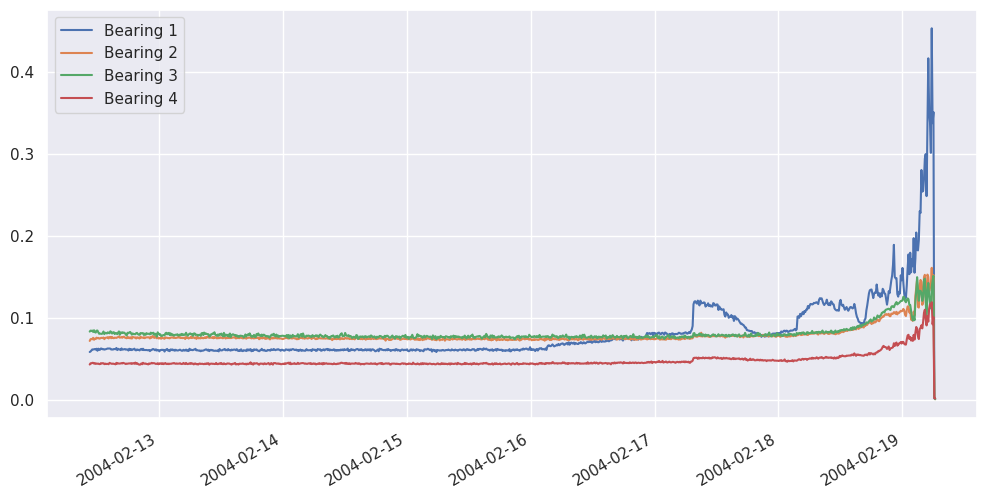

In [65]:
df.plot(figsize=(12, 6))

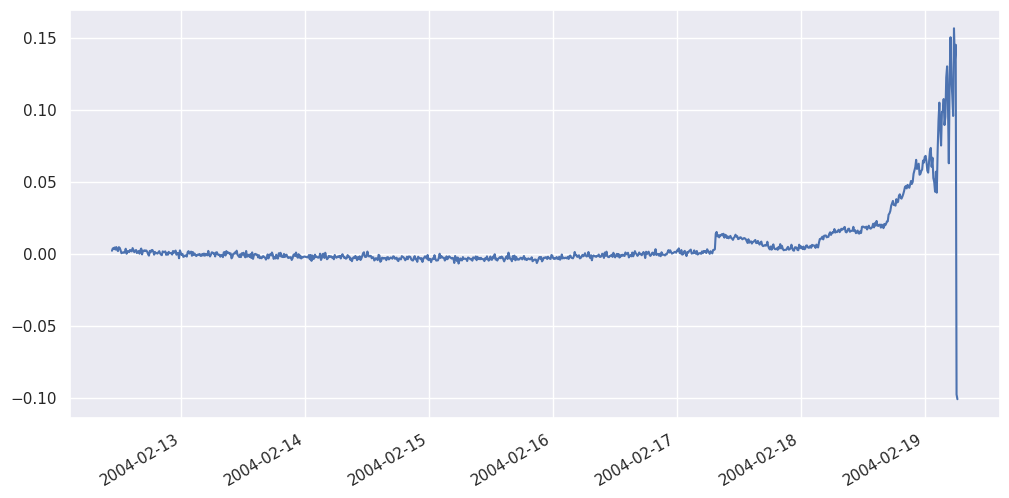

In [66]:
x_train = df['2004-02-12 10:32:39':'2004-02-13 23:42:39']
x_test = df['2004-02-13 23:52:39':]

pca = PCA(n_components=1, random_state=0)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train), index=x_train.index)
x_test_pca = pd.DataFrame(pca.transform(x_test), index=x_test.index)

# combine the partial datasets
df_pca = pd.concat([x_train_pca, x_test_pca])
df_pca.plot(figsize=(12, 6))
plt.legend().remove()

<Axes: >

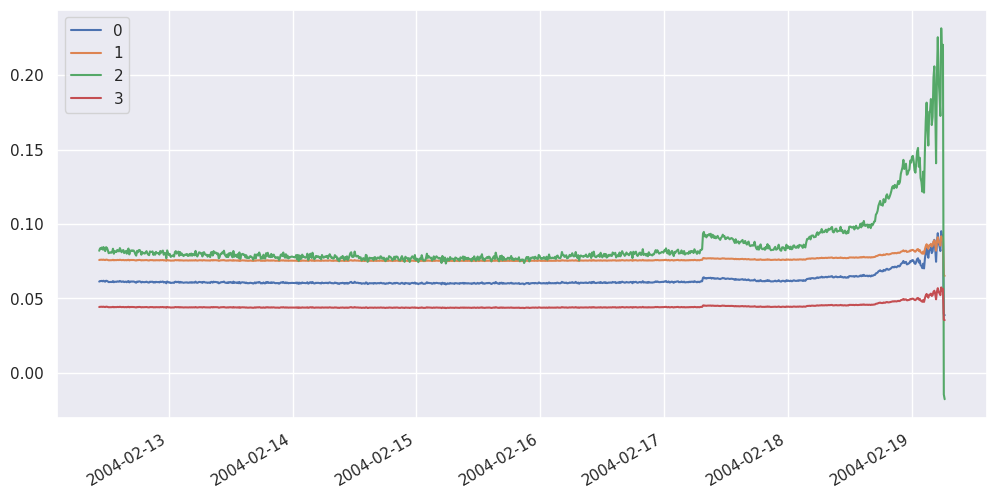

In [67]:
df_pca_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
df_pca_restored.plot(figsize=(12, 6))

<Axes: >

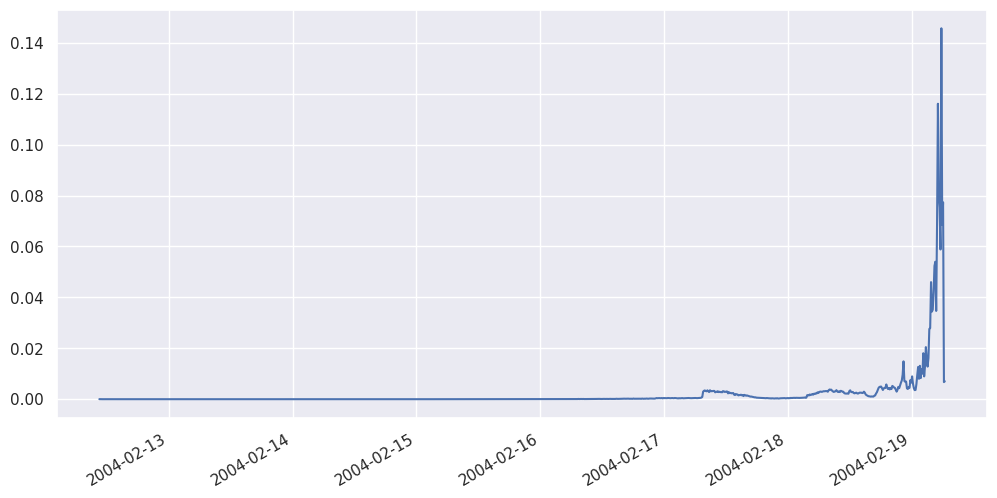

In [68]:
# computing the loss
scores = get_anomaly_scores(df, df_pca_restored)
scores.plot(figsize=(12, 6))

In [78]:
def is_anomaly(row, pca, threshold):
    pca_row = pca.transform(row)
    restored_row = pca.inverse_transform(pca_row)
    losses = np.sum((row - restored_row) ** 2, axis=0)

    # print(losses)

    for loss in losses:
        if loss > threshold:
            return True
    return False

In [79]:
x = df.loc[['2004-02-16 22:52:39']]
is_anomaly(x, pca, 0.002)

False

In [80]:
x

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-16 22:52:39,0.080961,0.075373,0.07664,0.046269


In [81]:
x = df.loc[['2004-02-18 22:52:39']]
is_anomaly(x, pca, 0.002)

True

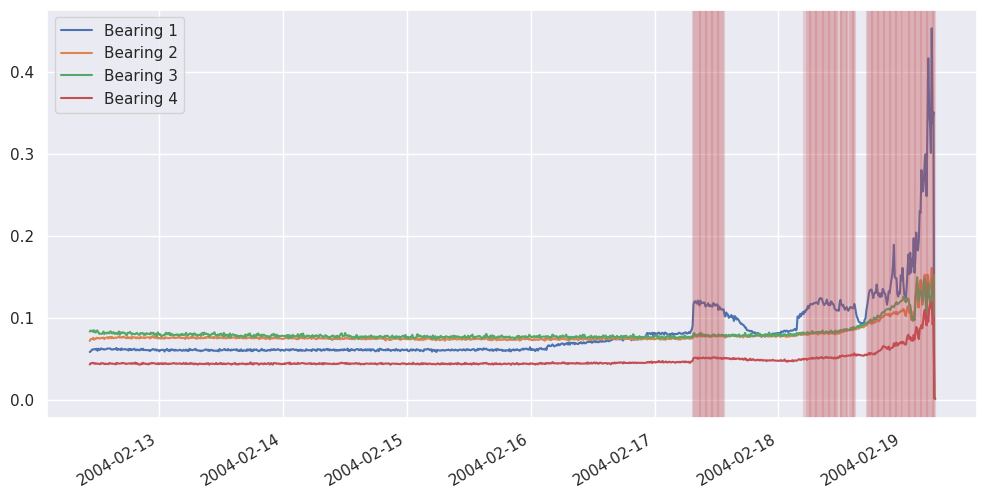

In [82]:
df.plot(figsize=(12, 6))

for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.002):
        plt.axvline(row.name, color='r', alpha=0.2)

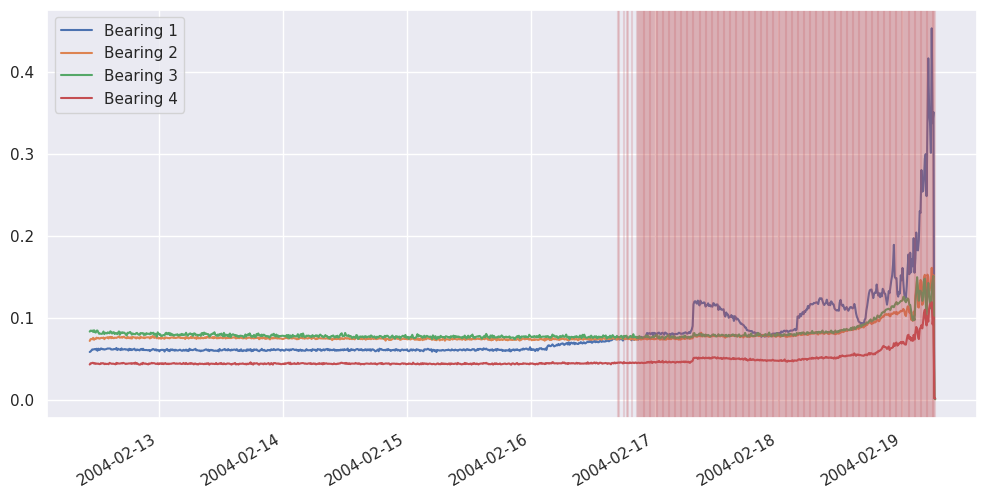

In [83]:
# using another threshold
df.plot(figsize=(12, 6))

for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.0002):
        plt.axvline(row.name, color='r', alpha=0.2)